In [6]:
!pip install graphviz

In [8]:
!pip install pydotplus

     |████████████████████████████████| 286kB 7.4MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [11]:
!pip install sklearn

  Stored in directory: /home/dsxuser/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [14]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import pydotplus
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Cleaning the data
csv_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(csv_path)
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

(169126, 38)

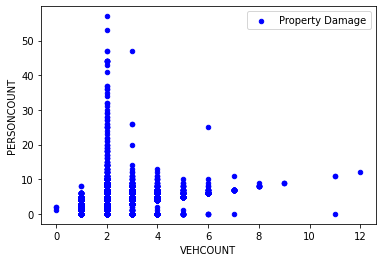

In [68]:
ax = df[df["SEVERITYCODE"] == 1].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Blue", label = "Property Damage")
plt.show()

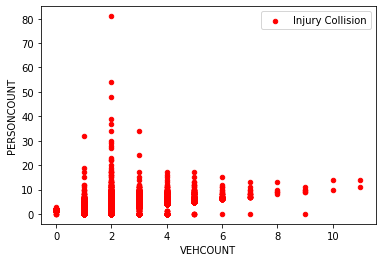

In [69]:
ax = df[df["SEVERITYCODE"] == 2].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Red", label = "Injury Collision")
plt.show()

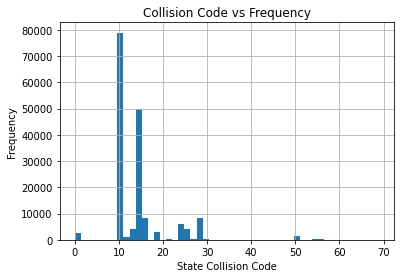

In [70]:
df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision Code vs Frequency")
plt.xlabel("State Collision Code")
plt.ylabel("Frequency")
plt.show()

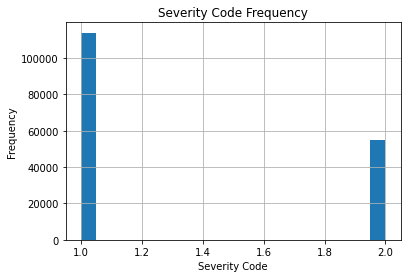

In [71]:
df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Code Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

In [72]:
X= df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

Actual values of the test cases: [2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2]


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

In [74]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_hat = clf_tree.predict(X_train)
scores["Tree-f1-score"] = f1_score(y_train, y_hat, average = "weighted")
scores["Tree-jaccard"] = jaccard_score(y_train, y_hat)
print("Using a decision tree, we get the predicted values to be: " + str(y_hat[0:20]))
scores

Using a decision tree, we get the predicted values to be: [2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


{'Tree-f1-score': 0.6902247634772901, 'Tree-jaccard': 0.7139185672490989}

In [75]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"],  
                     class_names='SEVERITYCODE',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"20, 20!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

Test set Accuracy at k= 1 :  0.30121733966745845
Test set Accuracy at k= 2 :  0.5406360424028268
Test set Accuracy at k= 3 :  0.5316246382802811
Test set Accuracy at k= 4 :  0.5752497371188223
Test set Accuracy at k= 5 :  0.5901874914465581
Test set Accuracy at k= 6 :  0.5876661840200079
Test set Accuracy at k= 7 :  0.5934058393659725
Test set Accuracy at k= 8 :  0.69045830202855
Test set Accuracy at k= 9 :  0.6993428081193953


Text(0, 0.5, 'Testing Accuracy')

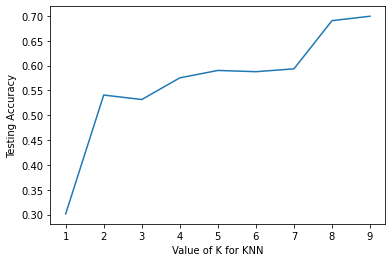

In [48]:
k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    y_hat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_score(y_test, y_hat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [76]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))

Predicted values using k = 9: [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [77]:
print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_score(y, y_hat)))

KNN F1-Score: 0.601255208417448
KNN Jaccard Score: 0.6717197413185398
